In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi

In [112]:
def main(eye_name):
    print("Start processing")
    eye_image = cv2.imread("healthy/" + eye_name + ".jpg")
    eye_image = cv2.filter2D(eye_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)
    eye_image_grey = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)
    
    plt.title("Input image")
    plt.imshow(eye_image)
    plt.show()
    
    plt.title("Grey image - intermediate step")
    plt.imshow(eye_image_grey, cmap="gray")
    plt.show()
    
    width, height = np.shape(eye_image_grey)
    print(f"Check line: width : {width}, height : {height}")
    
    eye_image_grey_tmp = frangi(eye_image_grey)
    plt.title("Grey image after frangi - intermediate step")
    plt.imshow(eye_image_grey_tmp, cmap="gray")
    plt.show()
    
    
    final = elemnt(eye_image_grey_tmp, eye_image_grey, 0.0000002, 5, False)
    
    plt.title("Output image")
    plt.imshow(final, cmap="gray")
    plt.show()
    
    mask_image = cv2.imread("mask/" + eye_name + "_mask.tif")
    mask_image = cv2.cvtColor(mask_image, cv2.COLOR_RGB2GRAY)
    plt.title("Mask image")
    plt.imshow(mask_image, cmap="gray")
    plt.show()
    
    calculatingData(final, mask_image, True)
    
def testFunction(image_name, image_mask):
    print("Start processing")
    image = cv2.imread(image_name)
    image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
#     plt.title("Input image")
#     plt.imshow(image)
#     plt.show()
    
    mask = cv2.imread(image_mask)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    
#     plt.title("Mask image")
#     plt.imshow(mask, cmap="gray")
#     plt.show()
    
    final = elemnt(image_grey, mask, 100, 10, True)

    
def elemnt(frangi_image, image, cut_to_dark, cut_to_dark_for_result, test):
    width, height = np.shape(frangi_image)
    print(f"Check line in elemnt function: width : {width}, height : {height}")
    
    frangi_image_array_result = np.where(frangi_image <= cut_to_dark, 0, 255 - frangi_image)
    print("Check line: result array")
    array_result = np.where(image  < cut_to_dark_for_result, 0, frangi_image_array_result)
    
#     x2[:2, :3]  # two rows, three columns
    left_array = array_result[:height, :(width-1)]
    top_array = array_result[:(height-1), :width]
    bottom_array = array_result[:-1, :width]
    
    if test:
        print("\n\nTEST\n")
#         print("fragi_image array")
#         print(frangi_image)
#         print("\nimage array")
#         print(image)
#         print("\nfrangi_image_array_result array")
#         print(frangi_image_array_result)
        print("\narray_result array")
        print(array_result)
        print("\nleft_array array")
        print(left_array)
        print("\ntop_array array")
        print(top_array)
        print("\nbottom_array array")
        print(bottom_array)
        
    
    
    return array_result

def calculatingData(final_array, mask_array, test):
#     TODO make this function work
    width, height = np.shape(final_array)
    
    tp = np.where(np.all([final_array >= 250, mask_array >= 250]), 1, 0)
    tn = np.where(np.all([final_array < 250, mask_array < 250]), 1, 0)
    fp = np.where(np.all([final_array >= 250, mask_array < 250]), 1, 0)
    fn = np.where(np.all([final_array < 250, mask_array >= 255]), 1, 0)
    
    tp = np.sum(tp)
    tn = np.sum(tn)
    fp = np.sum(fp)
    fn = np.sum(fn)
    
    if test: 
        print(f"tp : {tp}")
        print(f"tn : {tn}")
        print(f"fp : {fp}")
        print(f"fn : {fn}")
        
        
    return tp, tn, fp, fn 
    
    

Start processing


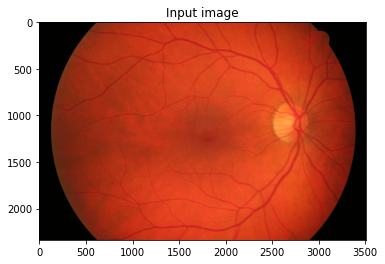

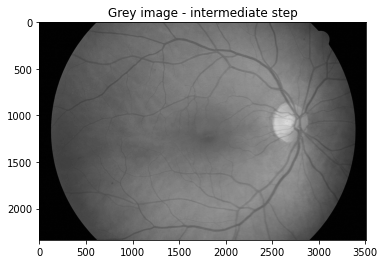

Check line: width : 2336, height : 3504


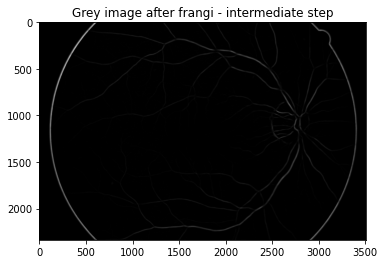

Check line in elemnt function: width : 2336, height : 3504
Check line: result array


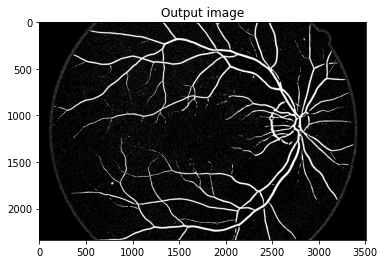

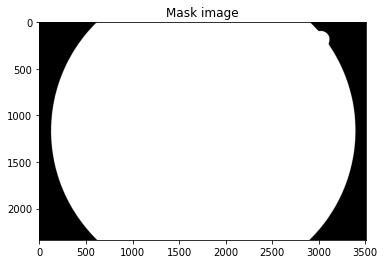

tp : 0
tn : 0
fp : 0
fn : 0


In [113]:
main("05_h")

In [82]:
testFunction("testImage/test.jpg", "testImage/mask.jpg")

Start processing
Check line in elemnt function: width : 10, height : 10
Check line: result array


TEST


array_result array
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 128  92  14   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]

left_array array
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 128  92  14   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]

top_array array
[[  0   0   0   0 